In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Datafuzzy():
    def __init__(self, score, decission):
        self.score = score
        self.decission = decission

In [3]:
markFollower = [0, 17000, 38000, 61000, 81000, 100000]
markEngagement = [0, 0.6, 2.3, 5.2, 7.9, 10]

### PLOT FOR FOLLOWER

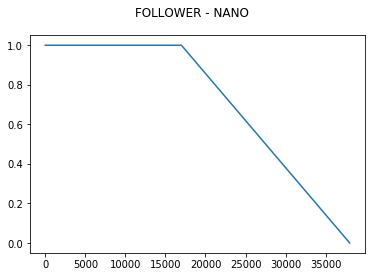

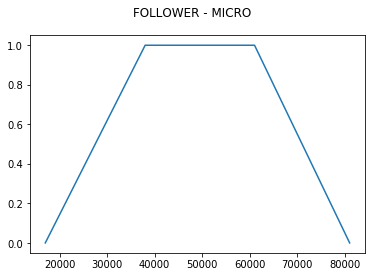

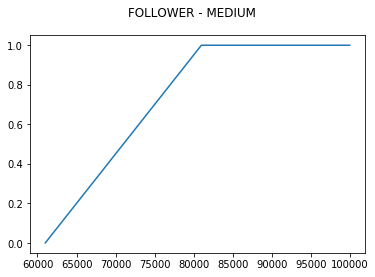

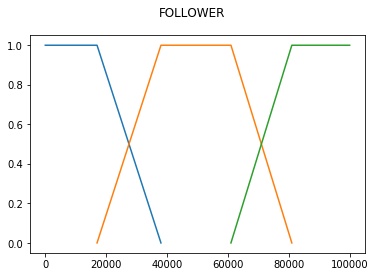

In [4]:
# THE FOLLOWERS'S VALUE AND NAME 

plt.plot(markFollower[:3], [1, 1, 0])
plt.suptitle("FOLLOWER - NANO")
plt.show()

plt.plot(markFollower[1:5], [0, 1, 1,0])
plt.suptitle("FOLLOWER - MICRO")
plt.show()

plt.plot(markFollower[3:], [0, 1, 1])
plt.suptitle("FOLLOWER - MEDIUM")
plt.show()

plt.plot(markFollower[:3], [1, 1, 0], label="NANO")
plt.plot(markFollower[1:5], [0, 1, 1,0], label="MICRO")
plt.plot(markFollower[3:], [0, 1, 1], label="MEDIUM")
plt.suptitle("FOLLOWER")
plt.show()

### PLOT FOR LINGUSITIC

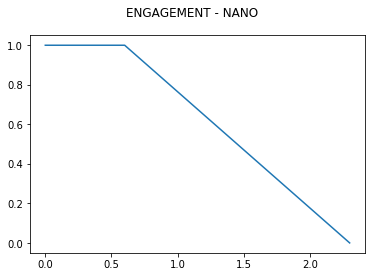

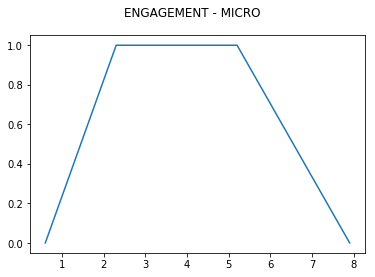

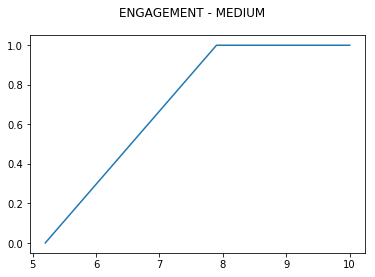

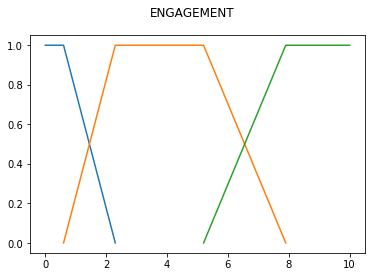

In [5]:
# THE LINGUISTIC'S VALUE AND NAME 

plt.plot(markEngagement[:3], [1, 1, 0])
plt.suptitle("ENGAGEMENT - NANO")
plt.show()

plt.plot(markEngagement[1:5], [0, 1, 1,0])
plt.suptitle("ENGAGEMENT - MICRO")
plt.show()

plt.plot(markEngagement[3:], [0, 1, 1])
plt.suptitle("ENGAGEMENT - MEDIUM")
plt.show()

plt.plot(markEngagement[:3], [1, 1, 0], label="NANO")
plt.plot(markEngagement[1:5], [0, 1, 1,0], label="MICRO")
plt.plot(markEngagement[3:], [0, 1, 1], label="MEIUM")
plt.suptitle("ENGAGEMENT")
plt.show()

## Fuzzification

In [7]:
# FOLLOWER=========================================
# membership function

def fuzzyFollower(countFol):
    follower = []
    
    # STABLE GRAPH
    if (markFollower[0] <= countFol and countFol < markFollower[1]):
        scoreFuzzy = 1
        follower.append(Datafuzzy(scoreFuzzy, "NANO"))

    # GRAPH DOWN
    elif (markFollower[1] <= countFol and countFol <= markFollower[2]):
        scoreFuzzy = np.absolute((markFollower[2] - countFol) / (markFollower[2] - markFollower[1]))
        follower.append(Datafuzzy(scoreFuzzy, "NANO"))
      
    # MICRO
    # GRAPH UP
    if (markFollower[1] <= countFol and countFol <= markFollower[2]):
        scoreFuzzy = 1 - np.absolute((markFollower[2] - countFol) / (markFollower[2] - markFollower[1])) 
        follower.append(Datafuzzy(scoreFuzzy, "MICRO"))
      
    # STABLE GRAPH
    elif (markFollower[2] < countFol and countFol < markFollower[3]):
        scoreFuzzy = 1
        follower.append(Datafuzzy(scoreFuzzy, "MICRO"))
      
    # GRAPH DOWN
    elif (markFollower[3] <= countFol and countFol <= markFollower[4]):
        scoreFuzzy = np.absolute((markFollower[4] - countFol) / (markFollower[4] - markFollower[3]))
        follower.append(Datafuzzy(scoreFuzzy, "MICRO"))

    # MEDIUM
    # GRAPH UP
    if (markFollower[3] <= countFol and countFol <= markFollower[4]):
        scoreFuzzy = 1 - scoreFuzzy
        follower.append(Datafuzzy(scoreFuzzy, "MEDIUM"))
      
    # STABLE GRAPH
    elif (countFol > markFollower[4]):
        scoreFuzzy = 1
        follower.append(Datafuzzy(scoreFuzzy, "MEDIUM"))
    
    return follower
    
# ENGAGEMENT RATE =========================================
# membership function
def fuzzyEngagement(countEng):
    engagement = []
    
    # STABLE GRAPH
    if (markEngagement[0] < countEng and countEng < markEngagement[1]):
        scoreFuzzy = 1
        engagement.append(Datafuzzy(scoreFuzzy, "NANO"))
      
    # GRAPH DOWN
    elif (markEngagement[1] <= countEng and countEng <= markEngagement[2]):
        scoreFuzzy = np.absolute((markEngagement[2] - countEng) / (markEngagement[2] - markEngagement[1]))
        engagement.append(Datafuzzy(scoreFuzzy, "NANO"))
      
    # MICRO
    # THE GRAPH GOES UP
    if (markEngagement[1] <= countEng and countEng <= markEngagement[2]):
        scoreFuzzy =  1 - scoreFuzzy
        engagement.append(Datafuzzy(scoreFuzzy, "MICRO"))
        
    # STABLE GRAPH
    elif (markEngagement[2] < countEng and countEng < markEngagement[3]):
        scoreFuzzy = 1
        engagement.append(Datafuzzy(scoreFuzzy, "MICRO"))

    # GRAPH DOWN
    elif (markEngagement[3] <= countEng and countEng <= markEngagement[4]):
        scoreFuzzy = np.absolute((markEngagement[4] - countEng) / (markEngagement[4] - markEngagement[3]))
        engagement.append(Datafuzzy(scoreFuzzy, "MICRO"))

    # MEDIUM
    # THE GRAPH GOES UP
    if (markEngagement[3] <= countEng and countEng <= markEngagement[4]):
        scoreFuzzy = 1 - scoreFuzzy 
        engagement.append(Datafuzzy(scoreFuzzy, "MEDIUM"))
      
    # STABLE GRAPH
    elif (countEng > markEngagement[4]):
        scoreFuzzy = 1
        engagement.append(Datafuzzy(scoreFuzzy, "MEDIUM"))
    
    return engagement

## Inference

In [33]:
# Fuzzy Rules
def fuzzyRules(follower, engagement):
    temp_yes = []
    temp_no = []
    # First decision Follower test is Nano
    if (follower[0].decission == "NANO"):
        # Get minimal score fuzzy every decision NO or YES
        temp_yes.append(min(follower[0].score,engagement[0].score))
        
        # if get 2 data fuzzy Engagement
        if (len(engagement) > 1):
            temp_yes.append(min(follower[0].score,engagement[1].score))
            
    # First decision of Follower is Micro or Medium                     
    else:
        if (engagement[0].decission == "NANO"):
            temp_no.append(min(follower[0].score, engagement[0].score))
            
        elif (engagement[0].decission == "MICRO"):
            if (follower[0].decission == "MICRO"):
                temp_yes.append(min(follower[0].score, engagement[0].score))
            else:
                temp_no.append(min(follower[0].score,engagement[0].score))
        else:
            temp_yes.append(min(follower[0].score, engagement[0].score))
            
        # if get 2 data fuzzy engagement 
        if (len(engagement) > 1):
            if (engagement[1].decission == "NANO"):
                temp_no.append(min(follower[0].score, engagement[1].score))
                
            elif (engagement[0].decission == "MICRO"):
                if (follower[0].decission == "MICRO"):
                    temp_yes.append(min(follower[0].score, engagement[1].score))
                else:
                    temp_no.append(min(follower[0].score,engagement[1].score))
            else:
                temp_yes.append(min(follower[0].score, engagement[1].score))
                
    # if get 2 data fuzzy Follower                    
    if (len(follower) > 1):
        # Second decision Follower is Nano
        if (follower[1].decission == "NANO"):
            temp_yes.append(min(engagement[0].score,follower[1].score))  
            
            if (len(engagement) > 1):
                temp_yes.append(min(engagement[1].score,follower[1].score))
                
        # Second decision follower is Micro or Medium
        else:
            if (engagement[0].decission == "NANO"):
                temp_no.append(min(follower[1].score, engagement[0].score))
                
            elif (engagement[0].decission == "MICRO"):
                if (follower[1].decission == "MICRO"):
                    temp_yes.append(min(follower[1].score, engagement[0].score))
                else:
                    temp_no.append(min(follower[1].score,engagement[0].score))
                    
            #if get 2 data fuzzy Engagement 
            if (len(engagement) > 1):
                if (engagement[1].decission == "NANO"):
                    temp_no.append(min(follower[1].score, engagement[1].score))
                    
                elif (engagement[1].decission == "MICRO"):
                    if (follower[1].decission == "MICRO"):
                        temp_yes.append(min(follower[1].score, engagement[1].score))
                    else:
                        temp_no.append(min(follower[1].score,engagement[1].score))

    return temp_yes, temp_no

### Result

In [34]:
# Result
def getResult(resultYes, resultNo):
    yes = 0
    no = 0

    if(resultNo):
        no = max(resultNo)
    if(resultYes):
        yes = max(resultYes)
        
    return yes, no

### Defuzzification

In [35]:
def finalDecission(yes, no):
    mamdani = (((10 + 20 + 30 + 40 + 50 + 60 + 70) * no) + ((80 + 90 + 100) * yes)) / ((7 * no) + (yes * 3))
    return mamdani

### Main Function

In [36]:
def mainFunction(followerCount, engagementRate):
    follower = fuzzyFollower(followerCount)
    engagement = fuzzyEngagement(engagementRate)
    resultYes, resultNo = fuzzyRules(follower, engagement)
    yes, no = getResult(resultYes, resultNo)

    return finalDecission(yes, no)

In [37]:
data = pd.read_csv('influencers.csv')
data

,id,followerCount,engagementRate
0,1,6207,1.0
1,2,38237,5.8
2,3,14840,0.6
3,4,43851,1.4
4,5,15530,3.5
5,6,24050,3.3
6,7,44837,1.3
7,8,10029,3.4
8,9,14531,0.2
9,10,7862,2.8


In [83]:
hasil = []
result = []
idd = []

for i in range (len(data)):
    # Insert ID and the score into the list
    hasil.append([data.loc[i, 'id'], mainFunction(data.loc[i, 'followerCount'], data.loc[i, 'engagementRate'])])
    result.append([data.loc[i, 'id'], (data.loc[i, 'followerCount'] * data.loc[i, 'engagementRate'] / 100)])
    
# Sorted list of hasil by fuzzy score DECREMENT
hasil.sort(key=lambda x:x[1], reverse=True)
result.sort(key=lambda x:x[1], reverse=True)

In [91]:
result = result[:20]
hasil = hasil[:20]
idd = [row[0] for row in result]

In [92]:
hasil

[[100, 90.00000000000001],
 [1, 90.0],
 [3, 90.0],
 [5, 90.0],
 [6, 90.0],
 [8, 90.0],
 [9, 90.0],
 [10, 90.0],
 [12, 90.0],
 [15, 90.0],
 [19, 90.0],
 [20, 90.0],
 [22, 90.0],
 [24, 90.0],
 [27, 90.0],
 [28, 90.0],
 [29, 90.0],
 [30, 90.0],
 [31, 90.0],
 [32, 90.0]]

In [93]:
idd

[11,
 13,
 59,
 60,
 41,
 75,
 72,
 19,
 61,
 2,
 25,
 53,
 93,
 74,
 48,
 76,
 67,
 100,
 36,
 39]

In [96]:
def cekAkurasi(hasil, result):
    count = 0
    for i in range(len(hasil)):
        if (hasil[i][0] in idd):
            count += 1
    return count

In [98]:
print("AKURASI : ", cekAkurasi(hasil, result)/20*100, " %")

AKURASI :  10.0  %


In [99]:
chosen = pd.DataFrame(hasil[:20], columns=['ID', 'Score'])

In [100]:
chosen

,ID,Score
0,100,90.0
1,1,90.0
2,3,90.0
3,5,90.0
4,6,90.0
5,8,90.0
6,9,90.0
7,10,90.0
8,12,90.0
9,15,90.0


In [101]:
chosen.to_csv('choosen.csv')